# Ford GoBike Dataset
## by Khaled Basiony

## Preliminary Wrangling

This Dataset is from a bike-share programme focused in San Francisco, with roughly 180K observations about starting station, ending station, duration, etc...

In [1]:
# import all packages and set plots to be embedded inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#download data
link = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
r = requests.get(link)

In [3]:
#save data to disk
with open('data.csv', 'wb') as file:
    file.write(r.content)

In [4]:
#read dataframe and display the first few rows
df = pd.read_csv('data.csv')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Since my main focus for this project is visualization, I won't dive deep into assessing and cleaning the data, I'll just handle the main issues that grabbed my attention, which are: <br>
- remove nulls since they are not a big part of the data.
- turn start_time/end_time columns into appropiate data types.
- convert duration to timedelta.
- group (start, end) stations together to obtain route.
- calculate distance from route.
- calculate age from birth year.
- convert bike_share_all_trip to 0's and 1's for easier treatment.

In [8]:
#drop rows containing nulls
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [9]:
#convert columns to appropiate types
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#rename column to appropiate name
df.rename(columns={'duration_sec':'duration'}, inplace=True)

#convert duration columns to timedelta
df['duration'] = df['end_time'] - df['start_time']

In [10]:
df.drop('index', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration                 174952 non-null  timedelta64[ns]
 1   start_time               174952 non-null  datetime64[ns] 
 2   end_time                 174952 non-null  datetime64[ns] 
 3   start_station_id         174952 non-null  float64        
 4   start_station_name       174952 non-null  object         
 5   start_station_latitude   174952 non-null  float64        
 6   start_station_longitude  174952 non-null  float64        
 7   end_station_id           174952 non-null  float64        
 8   end_station_name         174952 non-null  object         
 9   end_station_latitude     174952 non-null  float64        
 10  end_station_longitude    174952 non-null  float64        
 11  bike_id                  174952 non-null  int64          
 12  us

In [11]:
#create ordered list of counts of routes
start_end_counts = df.groupby(['start_station_id', 'end_station_id']).size()\
                    .sort_values(ascending=False).rename('count')

#check if the index results in the tuple we want (start, end)
start_end_counts.index

MultiIndex([( 81.0,  15.0),
            (196.0, 182.0),
            ( 15.0,   6.0),
            (182.0, 196.0),
            (  6.0,  16.0),
            ( 90.0,  67.0),
            (280.0, 296.0),
            ( 58.0,  21.0),
            (296.0, 280.0),
            ( 58.0,  67.0),
            ...
            (197.0, 168.0),
            ( 71.0, 106.0),
            ( 71.0, 110.0),
            ( 71.0, 112.0),
            (197.0, 160.0),
            ( 71.0, 116.0),
            ( 71.0, 129.0),
            ( 71.0, 134.0),
            ( 71.0, 144.0),
            (123.0, 136.0)],
           names=['start_station_id', 'end_station_id'], length=23303)

In [12]:
#create a dict for station names by id, it should come in handy later
start_stations = df.groupby('start_station_id')['start_station_name'].unique().apply(lambda x: x[0])
end_stations = df.groupby('end_station_id')['end_station_name'].unique().apply(lambda x: x[0])

In [13]:
#create function to calculate distance
def dist(df):
    R = 6371e3
    lat1, lat2 = df['start_station_latitude'], df['end_station_latitude']
    lon1, lon2 = df['start_station_longitude'], df['end_station_longitude']    
    lat_diff = np.abs(lat1 - lat2)
    lon_diff = np.abs(lon2 - lon2)
    
    a = np.sin(lat_diff/2 * np.pi/180)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon_diff/2 * np.pi/180)**2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    return R * c

df['dist'] = dist(df)

The method used in the previouse cell is based on the haversine formula, which can be found here: <br>
https://www.movable-type.co.uk/scripts/latlong.html

In [14]:
df['bike_share_for_all_trip'] = pd.get_dummies(df['bike_share_for_all_trip'])['Yes']

In [15]:
df['age'] = df['start_time'].dt.year - df['member_birth_year']
df['age']

0         35.0
1         47.0
2         30.0
3         45.0
4         60.0
          ... 
174947    23.0
174948    35.0
174949    29.0
174950    31.0
174951    30.0
Name: age, Length: 174952, dtype: float64

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [16]:
df

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,age
0,0 days 14:29:45.830000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,0,512.119354,35.0
1,0 days 17:10:54.928000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,0,1898.093908,47.0
2,0 days 10:08:10.832000,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,0,169.618435,30.0
3,0 days 00:26:25.525000,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,1,1317.443599,45.0
4,0 days 00:29:53.128000,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,0,3069.674272,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,0 days 00:08:00.310000,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,0,26.762189,23.0
174948,0 days 00:05:13.758000,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,0,1210.222060,35.0
174949,0 days 00:02:21.671000,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,1,191.855726,29.0
174950,0 days 00:02:19.927000,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,0,720.042747,31.0


### What is the structure of your dataset?

> The data set has 18 columns with around 175k observations, no nulls.

### What is/are the main feature(s) of interest in your dataset?

> duration and distance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - user type
> - age
> - gender
> - location
> - time
> - distance
> - bike_share_for_all_trip

## Univariate Exploration

For starters, let's check the user types that use the programme.

<AxesSubplot:xlabel='user_type', ylabel='count'>

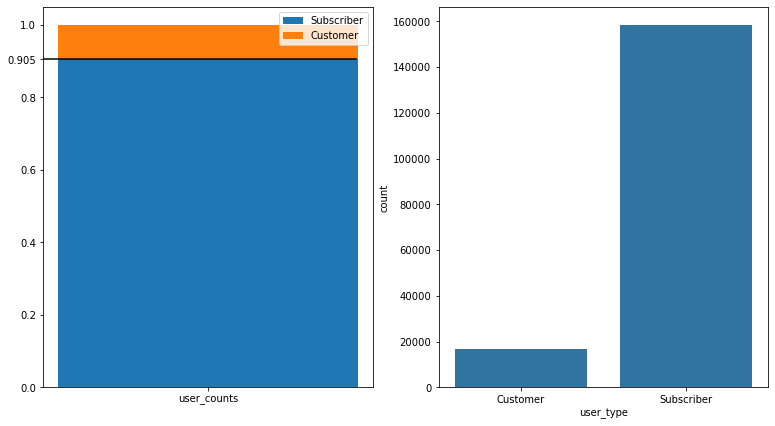

In [17]:
#get proportions of each user type
user_counts = df['user_type'].value_counts(normalize=True)

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 1)
#create lower bar
plt.bar(['user_counts'], user_counts['Subscriber'], label='Subscriber')
#create upper bar
plt.bar(['user_counts'], user_counts['Customer'], bottom=user_counts['Subscriber'], label='Customer')
#create horizontal line that divides them
plt.axhline(y=user_counts['Subscriber'], xmax=0.95, c='k')
plt.legend()
yt = np.around(np.insert(plt.gca().get_yticks(), -2, user_counts['Subscriber']), 3)
plt.yticks(yt[:-1], yt[:-1]);

plt.subplot(1, 2, 2)
sns.countplot(x=df['user_type'], color=sns.color_palette()[0])

Apparantely there are much more subscriber users than customers, which is a very good thing.

[Text(20, 0, '20'), Text(30, 0, '30'), Text(50, 0, '50'), Text(70, 0, '70'), Text(100, 0, '100'), Text(200, 0, '200')]


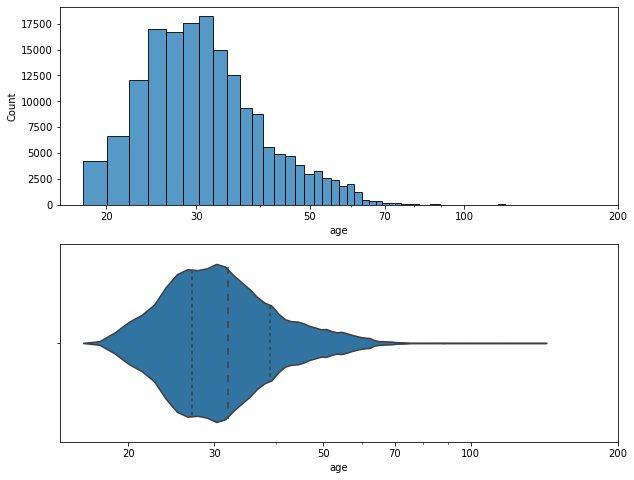

In [18]:
#create a histogram for age distributions on a log scale
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='age', bins=60)
plt.xscale('log')
xt = [ 20, 30, 50, 70, 100, 200]
plt.xticks(xt, xt)

#create a violinplot for the same distribution
plt.subplot(2, 1, 2)
sns.violinplot(data=df, x='age', inner='quartile')
plt.xscale('log')
plt.xticks(xt, xt);
print(plt.gca().get_xticklabels())

it seems that most of the users fall between mid 20's and around 40, but there are some unusual numbers there, so let's check them out

In [19]:
df.nlargest(20, 'age')

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,age
26352,0 days 00:24:34.907000,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,0,4813.296522,141.0
1238,0 days 00:02:28.340000,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,1,787.893892,119.0
10407,0 days 00:21:55.572000,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,0,926.887014,119.0
15483,0 days 00:18:51.158000,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,0,1000.054464,119.0
18665,0 days 00:10:41.764000,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,0,2443.409379,119.0
20650,0 days 00:23:44.845000,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900.0,Male,0,926.887014,119.0
20732,0 days 00:11:41.203000,2019-02-26 09:06:11.239,2019-02-26 09:17:52.442,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9.0,Broadway at Battery St,37.798572,-122.400869,5337,Customer,1900.0,Male,0,2438.828148,119.0
23156,0 days 00:03:14.664000,2019-02-25 18:58:10.644,2019-02-25 19:01:25.308,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,6363,Subscriber,1900.0,Male,1,787.893892,119.0
25161,0 days 00:06:50.140000,2019-02-25 13:38:12.067,2019-02-25 13:45:02.207,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,3311,Subscriber,1900.0,Male,1,1329.260507,119.0
26644,0 days 00:18:07.127000,2019-02-25 09:10:39.549,2019-02-25 09:28:46.676,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5250,Subscriber,1900.0,Male,0,1000.054464,119.0


looks like there is some sort of default value for the birth year here, which is 1900, which makes the age 119, in addition to one weird case with the birth year 1878, probably it's a typo, for now let's check the counts of the 119 ages

In [20]:
df.query('age == 119').shape

(53, 18)

it looks like there are 53 records with the age 119, so this supports that it is infact the default value.

Now let's check the gender counts.

<AxesSubplot:xlabel='member_gender', ylabel='count'>

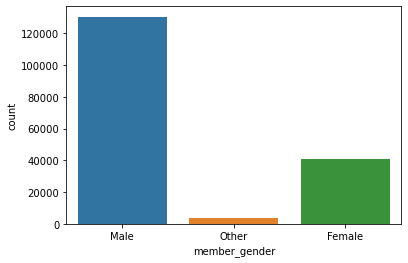

In [21]:
sns.countplot(data=df, x='member_gender')

looks like most of the customers are males rather than females, with a ratio of roughly 3:1

Now let's see which are the most common start stations and end stations.

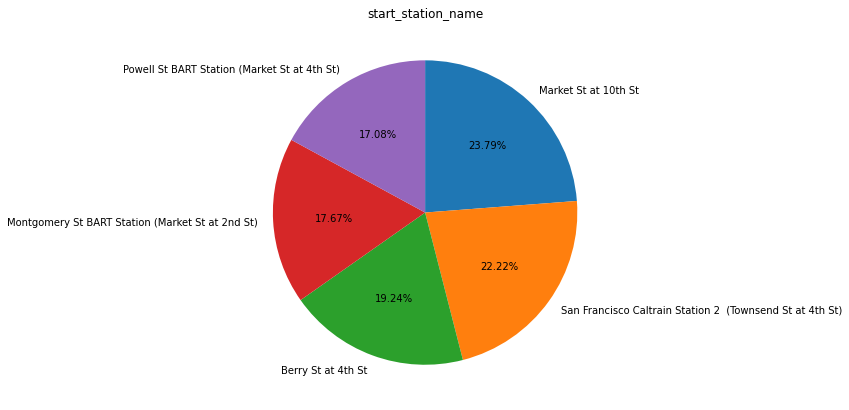

In [22]:
plt.figure(figsize=(7, 7))
ax = df['start_station_name'].value_counts()[:5].plot.pie(startangle=90, autopct='%.2f%%', counterclock=False)
ax.set_title(ax.get_ylabel())
ax.set_ylabel('')
ax.set_aspect('equal')

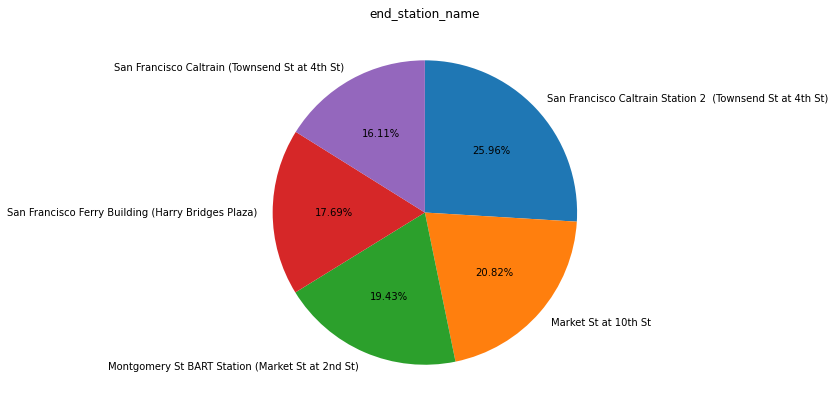

In [23]:
plt.figure(figsize=(7, 7))
ax = df['end_station_name'].value_counts()[:5].plot.pie(startangle=90, autopct='%.2f%%', counterclock=False)
ax.set_title(ax.get_ylabel())
ax.set_ylabel('')
ax.set_aspect('equal')

well it seems that there 2 stations that make the top 2 in each plot which are: <br>
- Market St at 10th St. <br>
- San Francisco Caltrain Station 2 (Townsend St at 4th St). <br>

Now let's have a look at the distances that each user has gone. <br><br>
**Note:** it's not actually the distance that the user travels, because I just calculated the difference between the start station and end station for each record, this doesn't describe the actual route that the user took, it's sort of like the displacement on spherical surface, but for the sake of simplicity I'll call it distance.

<AxesSubplot:xlabel='dist', ylabel='Count'>

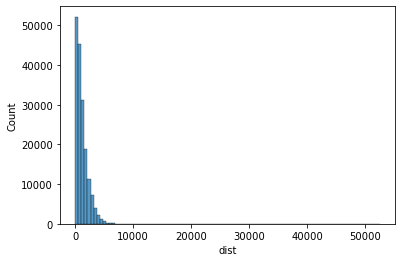

In [24]:
sns.histplot(data= df, x='dist', bins = 100)

Something seems weird here, let's check the summary statistics for this column

In [25]:
df['dist'].describe()

count    174952.000000
mean       1181.438847
std        1030.637850
min           0.000000
25%         441.803456
50%         918.208114
75%        1641.891753
max       52520.421715
Name: dist, dtype: float64

so most of them are below 1.5 km, but the max is 52 km which is really weird, and there are also a lot of zeroes there too, let's see how many

In [26]:
df['dist'].value_counts()[0]

3458

looks like there are a lot of zero distances here, which is weird, let's if the lon and lat for the start and end stations of these observations is infact the same

In [27]:
filt = df['dist']==0
df[filt]

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,age
17,0 days 00:14:34.613000,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,0,0.0,41.0
25,0 days 00:06:48.648000,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78.0,Folsom St at 9th St,37.773717,-122.411647,78.0,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982.0,Male,0,0.0,37.0
31,0 days 00:07:51.085000,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133.0,Valencia St at 22nd St,37.755213,-122.420975,133.0,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992.0,Male,0,0.0,27.0
51,0 days 00:57:58.322000,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995.0,Male,0,0.0,24.0
52,0 days 00:52:20.587000,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,3040,Subscriber,1983.0,Female,0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174863,0 days 00:24:36.440000,2019-02-01 02:45:04.744,2019-02-01 03:09:41.184,345.0,Hubbell St at 16th St,37.766483,-122.398279,345.0,Hubbell St at 16th St,37.766483,-122.398279,5224,Subscriber,1967.0,Male,0,0.0,52.0
174864,0 days 00:14:37.063000,2019-02-01 02:53:15.995,2019-02-01 03:07:53.058,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,4913,Subscriber,1987.0,Male,0,0.0,32.0
174872,0 days 01:35:13.834000,2019-02-01 01:02:55.168,2019-02-01 02:38:09.002,31.0,Raymond Kimbell Playground,37.783813,-122.434559,31.0,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972.0,Male,0,0.0,47.0
174895,0 days 00:14:34.138000,2019-02-01 01:41:43.414,2019-02-01 01:56:17.552,253.0,Haste St at College Ave,37.866418,-122.253799,253.0,Haste St at College Ave,37.866418,-122.253799,3232,Subscriber,1995.0,Male,1,0.0,24.0


so it's true, they do correspond to the same stations, but the durations are not equal to zero, so the customers must've cycled back to the same station again.

so for a more accurate measure, we will look at the distribution of durations instead.

Text(0.5, 0, 'duration (mins)')

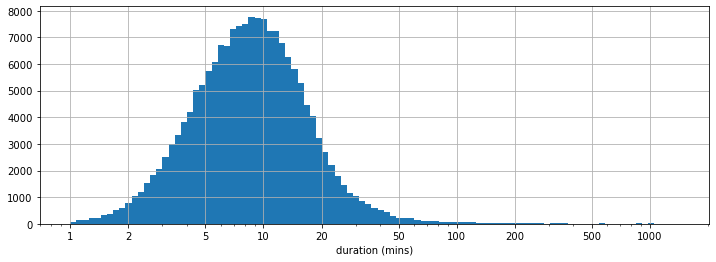

In [28]:
dur = df['duration'].dt.seconds/60

plt.figure(figsize=(12, 4))
bins = 10 ** np.linspace(0, np.log10(dur.max()), 100)
dur.hist(bins=bins)
xt = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xscale('log')
plt.xticks(xt, xt);
plt.xlabel('duration (mins)')

looks like it mostly falls under 20 mins.

Now let's check the start times, in the next cell I will count the number of observations throughout the: day, week and month respectively

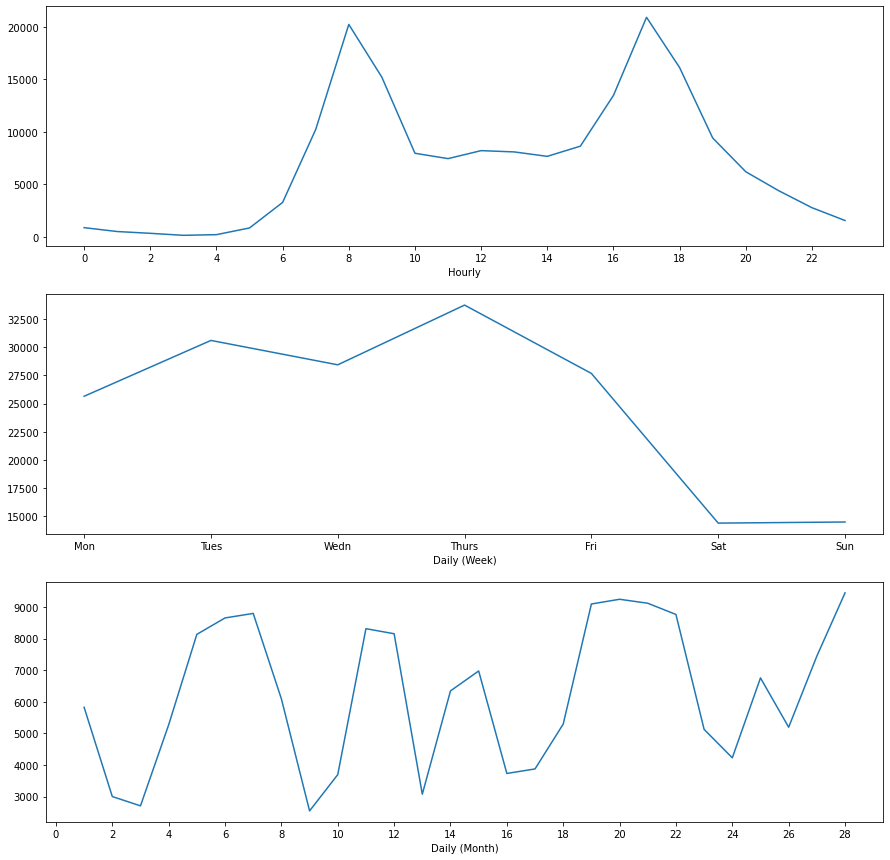

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# truncate the start time to hours only
plt.subplot(3, 1, 1)
df['start_time'].dt.hour.value_counts().sort_index().plot()
xt=np.arange(0, 23, 2)
plt.xlabel('Hourly')
plt.xticks(xt, xt);

#truncate the start time to day of week only
plt.subplot(3, 1, 2)
df['start_time'].dt.dayofweek.value_counts().sort_index().plot()
xt=np.arange(0, 7, 1)
plt.xlabel('Daily (Week)')
plt.xticks(xt, ['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri', 'Sat', 'Sun']);

#truncate the start time to day of month only
plt.subplot(3, 1, 3)
df['start_time'].dt.day.value_counts().sort_index().plot()
xt=np.arange(0, 29, 2)
plt.xlabel('Daily (Month)')
plt.xticks(xt, xt);

So as we can see here, the most common starting hours are around, 8 am and 5 pm, and since i truncated it to hours only, all the minutes would get floored so for example, 8:45 would be counted as 8, so keeping that in mind, the numbers seem to highly correlate with 9 to 5 jobs. <br>
and the distributions around the week, further supports this as the counts drop around the weekends. <br>

Now let's check the most common bikes that users take.

Text(0, 0.5, 'bike id')

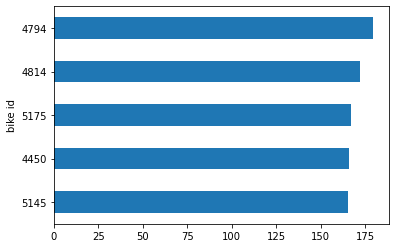

In [30]:
most_used_bikes = df['bike_id'].value_counts()[:5].sort_values(ascending=True)

most_used_bikes.plot.barh()
plt.ylabel('bike id')

looks like they are all above the 4000 id, but we will look more at this later on.

for now, let's check the most common routes.

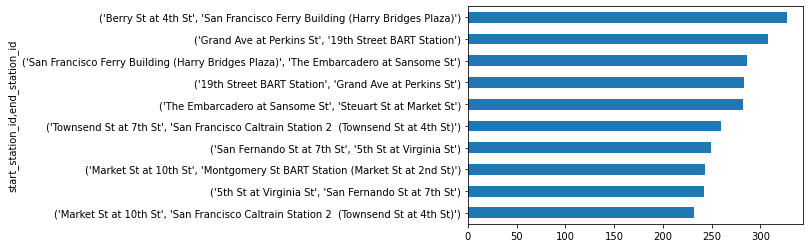

In [31]:
start_end_counts[:10][::-1].plot.barh()

xl = [(start_stations[i[0]], end_stations[i[1]]) for i in start_end_counts[:10].index]
xl

plt.gca().set_yticklabels(xl[::-1]);

Interestingly the 5 most common routes, don't include either of the most common start or end stations.

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

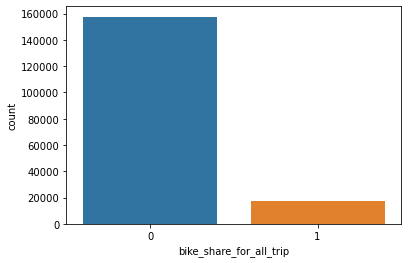

In [32]:
sns.countplot(x=df['bike_share_for_all_trip'])

it looks like most of the trips are not a 'bike_share_for_all_trip' <br>
unfortunately I don't quite understand what that means as there is no clear description for this, but I am guessing it is some sort of special membership or a trip that follows certain conditions or terms. <br>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the distribution of the duration is right skewed with a lot of outliers, so I made it on a log scale to find out that mostly the trips take between 5 to 10 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distance (or displacement to be more accurate) distribution had a lot of zeroes, but with time differences which means the users just went back to the starting station, so I didn't use it as a reliable measure. <br> <br>
the age distribution also has some weird values, some of the ages are unbelievebly high! and there seems to be like a defualt value of 119 (bron on 1900). 

## Bivariate Exploration

> let's check the the correlations between 1 variable and another, now primarily I'll be focusing on how everything affect duration and distance, since prolonging that means the program is working, and there is less time spent on cars!

But first things first! I need to clear all the outliers since they heavily affect all the data, so I'll create a function that'll remove any row containing an outlier in the numerical columns of interest.

In [33]:
# create a function that removes rows with any value that is 3 std away in their corresponding distribution.
from scipy import stats
def remove_outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores > 3).any(axis=1)
    new_df = df[~filtered_entries]
    return new_df

In [34]:
# using the copy method to avoid referencing the original dataframe
df_new = df[['age', 'dist', \
        'start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude']].copy()
df_new['duration'] = dur

In [35]:
df_new

,age,dist,start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude,duration
0,35.0,512.119354,-122.400811,37.789625,-122.402923,37.794231,869.750000
1,47.0,1898.093908,-122.426826,37.769305,-122.404904,37.786375,1030.900000
2,30.0,169.618435,-122.446546,37.774836,-122.444293,37.773311,608.166667
3,45.0,1317.443599,-122.271738,37.804562,-122.248780,37.792714,26.416667
4,60.0,3069.674272,-122.391198,37.770407,-122.405950,37.798014,29.883333
...,...,...,...,...,...,...,...
174947,23.0,26.762189,-122.391865,37.788059,-122.408531,37.788300,8.000000
174948,35.0,1210.222060,-122.400811,37.789625,-122.392741,37.778742,5.216667
174949,29.0,191.855726,-121.904888,37.331932,-121.908586,37.333658,2.350000
174950,31.0,720.042747,-122.273422,37.811351,-122.275698,37.817827,2.316667


In [36]:
df_new = remove_outliers(df_new)

In [37]:
df_new

,age,dist,start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude,duration
3,45.0,1317.443599,-122.271738,37.804562,-122.248780,37.792714,26.416667
4,60.0,3069.674272,-122.391198,37.770407,-122.405950,37.798014,29.883333
8,27.0,3309.683633,-122.403452,37.788975,-122.421339,37.759210,17.483333
9,23.0,951.724723,-122.413278,37.787327,-122.415929,37.778768,7.633333
10,26.0,233.319126,-122.411738,37.781074,-122.393572,37.783172,8.433333
...,...,...,...,...,...,...,...
174946,31.0,2537.112402,-122.427411,37.750900,-122.411647,37.773717,11.766667
174947,23.0,26.762189,-122.391865,37.788059,-122.408531,37.788300,8.000000
174948,35.0,1210.222060,-122.400811,37.789625,-122.392741,37.778742,5.216667
174950,31.0,720.042747,-122.273422,37.811351,-122.275698,37.817827,2.316667


In [38]:
# merging other columns of interest based on index
df_new = df_new.merge(df[['start_time', 'end_time']], left_index=True, right_index=True)

In [39]:
df_new.describe()

,age,dist,start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude,duration
count,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000
mean,34.035289,1144.903844,-122.374282,37.791886,-122.373838,37.792074,10.418549
std,9.325796,905.025744,0.061690,0.031991,0.060946,0.031718,8.192126
min,18.000000,0.000000,-122.453704,37.729279,-122.453704,37.729279,1.016667
25%,27.000000,454.246776,-122.413004,37.771917,-122.411738,37.772000,5.350000
50%,32.000000,927.777109,-122.398870,37.781074,-122.398773,37.782405,8.466667
75%,39.000000,1635.989428,-122.389970,37.798572,-122.389970,37.798572,12.933333
max,64.000000,4272.392174,-122.213037,37.880222,-122.213037,37.880222,93.833333


<AxesSubplot:>

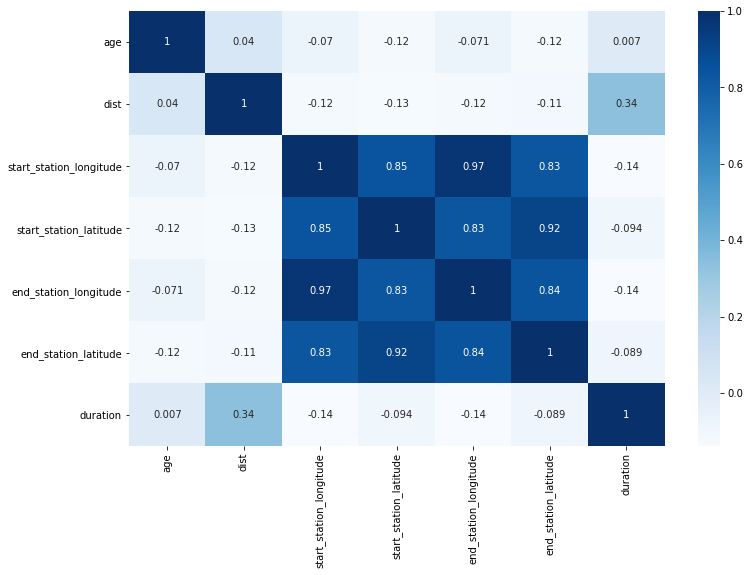

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')

Well there doesn't seem to be any sort of strong or even medium correlations here, but let's dig a little deeper.

let's start by checking the age vs duration.

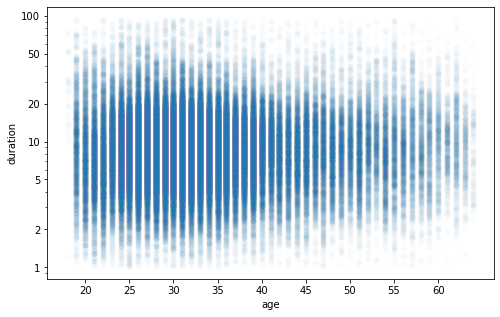

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_new, x='age', y='duration', alpha=0.02)
plt.yscale('log')
yt = [1, 2, 5, 10, 20, 50, 100]
plt.yticks(yt, yt);
xt = np.arange(20, 61, 5)
plt.xticks(xt, xt);

So generally most users are between 20 and 45, and the durations mostly vary from 2 to 20 mins, <br>
but it seems that the durations get closer and closer to 10 mins as the age increases.

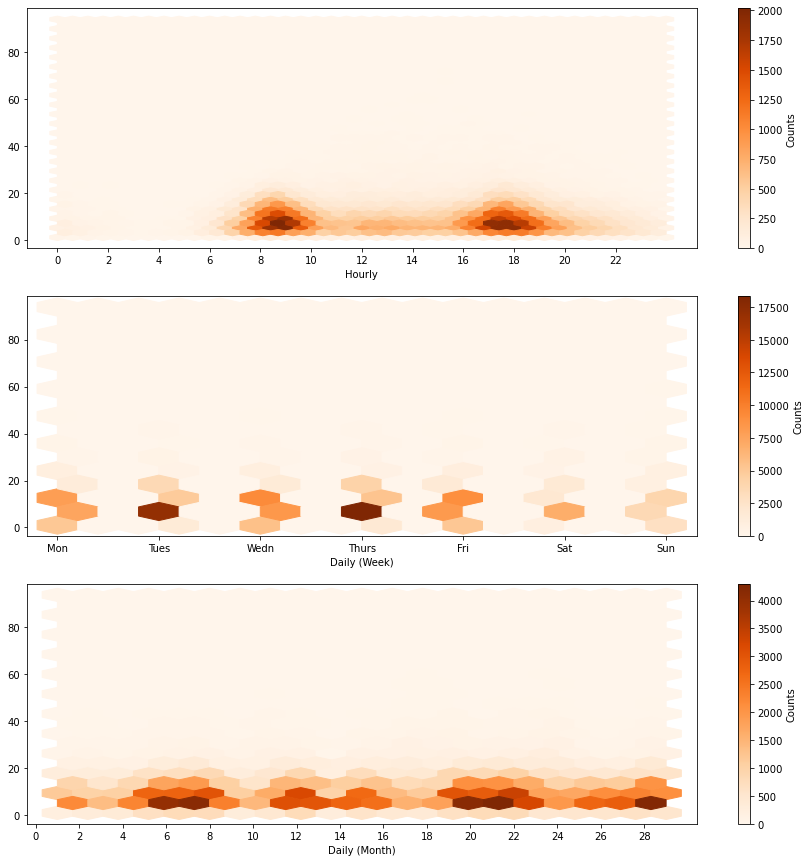

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

plt.subplot(3, 1, 1)
hours = df_new['start_time'].dt.hour + df_new['start_time'].dt.minute/60
plt.hexbin(x=hours, y=df_new['duration'], cmap='Oranges', gridsize=40)
xt=np.arange(0, 23, 2)
plt.xlabel('Hourly')
plt.xticks(xt, xt)
plt.colorbar().set_label('Counts')

plt.subplot(3, 1, 2)
dow = df_new['start_time'].dt.dayofweek
plt.hexbin(x=dow, y=df_new['duration'], cmap='Oranges', gridsize=15)
xt=np.arange(0, 7, 1)
plt.xlabel('Daily (Week)')
plt.xticks(xt, ['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.colorbar().set_label('Counts')

plt.subplot(3, 1, 3)
days = df_new['start_time'].dt.day + hours/24
plt.hexbin(x=days, y=df_new['duration'], cmap='Oranges', gridsize=20)
xt=np.arange(0, 29, 2)
plt.xlabel('Daily (Month)')
plt.xticks(xt, xt)
plt.colorbar().set_label('Counts')

Well this shows there is no special times where the durations has peak values of some sort.

Now we need to have a look at the stations locations, in the cell below there is some sort of a 2d Map using the longitude and latitude of the stations.

<AxesSubplot:xlabel='start_station_longitude', ylabel='start_station_latitude'>

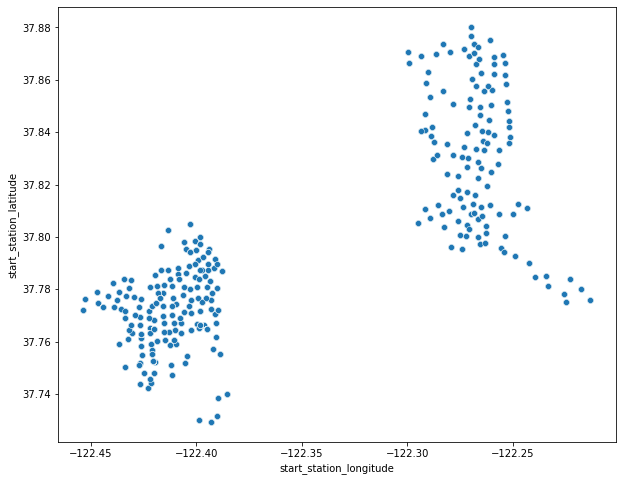

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_new, x='start_station_longitude', y='start_station_latitude')

There is an obvious gap there, and after using the help of google maps, I found out that the group on the left is san francisco, while the group on the right is oakland.

In [44]:
df_new['start_station_group'] = (df_new['start_station_longitude'] < -122.35).astype(int)
df_new['end_station_group'] = (df_new['end_station_longitude'] < -122.35).astype(int)

In [45]:
df_new.groupby(['start_station_group', 'end_station_group']).size()

start_station_group  end_station_group
0                    0                     38472
                     1                         3
1                    0                         1
                     1                    123644
dtype: int64

in the above cells I have encoded san francisco station as 1 and oakland stations as 0 <br>
and mostly everything happens within san francisco, and a minority happens in oakland, but the travel counts between them is relatively zero.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First of all the age and duration, Normally the ages are mostly between 20 and 45, and the duration varies from 2 to 20, but as the age increases, the duration gets closer and closer to 10 mins.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> At first I thought that the records were only from San Francisco, but after plotting the longitude and latitude together I found out there are also records from Oakland, and there might've been a few records from some place far away that got removed as outliers.

## Multivariate Exploration

> Now it's time to see how everything fits together.

First I need to see how the members are distributed accross the stations, in terms of gender and user_type.

In [46]:
df_new = df_new.merge(df[['member_gender', 'user_type']], left_index=True, right_index=True)

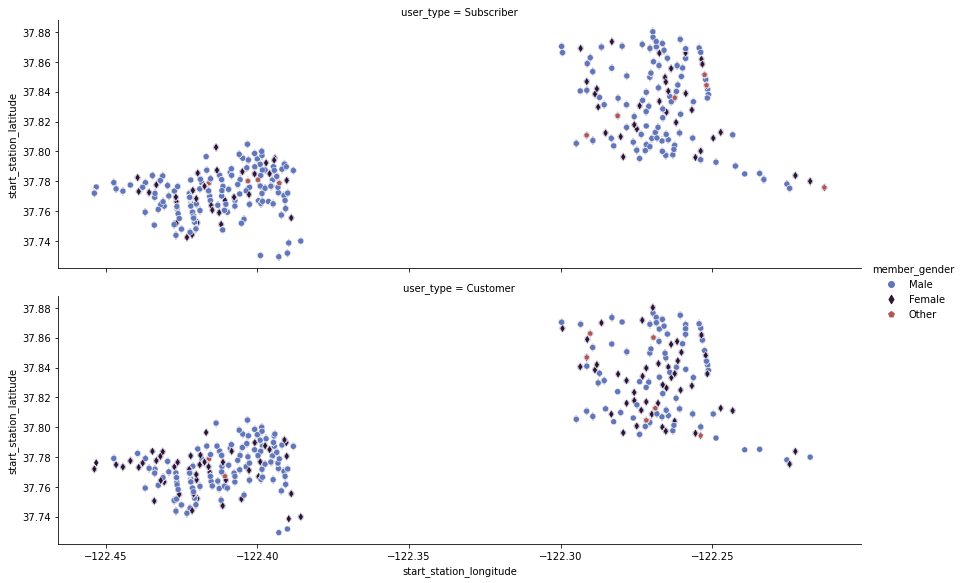

In [47]:
sns.relplot(data=df_new, x='start_station_longitude', y='start_station_latitude', style='member_gender',
            markers=['o', 'd', 'p'], hue='member_gender', row='user_type', palette='twilight', height=4, aspect=3)

the majority of users are males, but as you can see the larger portion of females are in the customers field, so maybe we should figure out a way to make more women subscribe.

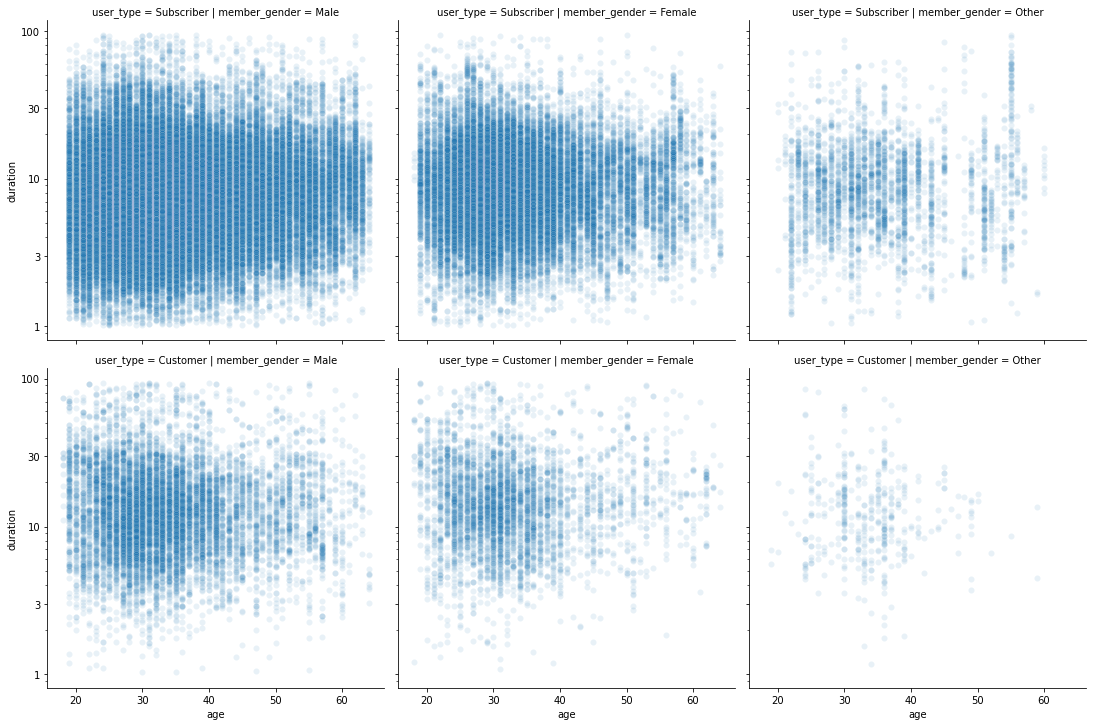

In [48]:
sns.relplot(data=df_new, x='age', y='duration', col='member_gender', row='user_type', alpha=0.1)
plt.yscale('log')
yt = [1, 3, 10, 30, 100]
plt.yticks(yt, yt);

Well it turns out that male subscribers are uniformly distributed accross age and durations, where as when the duration revolves around 10 is mainly due to unsubscribed customers and partially female subscribers.

<AxesSubplot:xlabel='start_station_longitude', ylabel='start_station_latitude'>

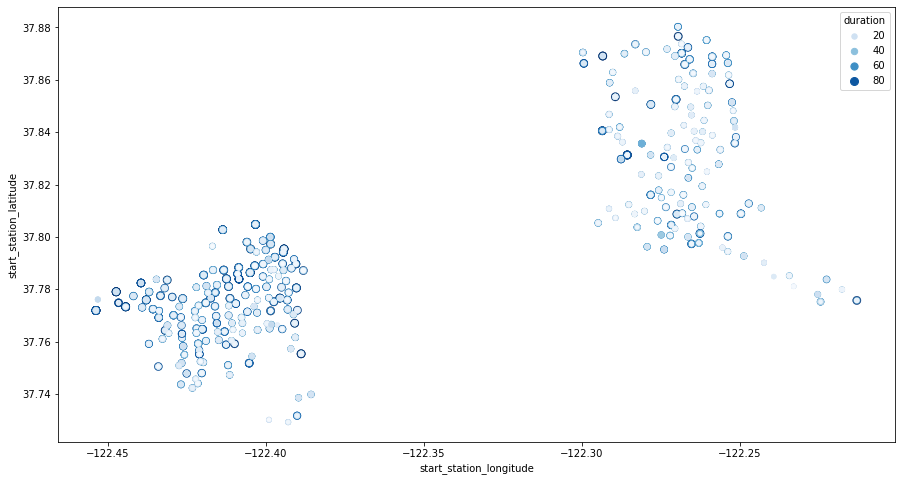

In [49]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_new, x='start_station_longitude', y='start_station_latitude', palette='Blues',
                hue='duration', size='duration', edgecolor=None,)

it seems that most of the high durations are in SF, maybe there could be a reason that stops people from Oakland from cycling more, or there the data is biased.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> it turns out that the durations tend to be more with male subscriber users, it is also increases in San Francisco rather than Oakland.

### Were there any interesting or surprising interactions between features?

> It looks like females are slightly more likely to be unsubsribing customers, so coming up with a plan to invite more subscription from women might be helpful.
And apparantely all the higher durations seem to be from San Francisco rather than Oakland

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', '--to', 'html', 'bikeshare_exploration.ipynb'])

0